# Student Id : 18203485
# Student Name : Fergus Mc Hale

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random as rd
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_circles
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
import pandas as pd

In [2]:
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

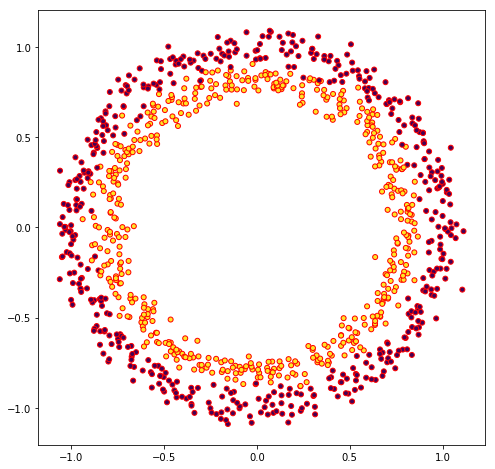

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='r')
plt.show()

In [6]:
print(X.shape)

(1000, 2)


* h - hypothesis set for linear classifier h(x) = sign(wTx) for classification remove sign for regression
* w - input space and bias w(0)
* d - dimensional input space since x0 - 1 is fixed


# Task 3 (CE6002)

* Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification. Notebook Etivity3_LinearClassification.ipynb is available in the git repository. Add your code to this notebook.
* Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).
* Now choose suitable new features and use these in your linear regression algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!
* Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.

In [26]:
# basing on vipuls approach that made the most common sense code wise and is more suitable to a machine learner
class linearmodel(object):
    
    def __init__(self,selection):
        if selection == "classification":
            self.is_classifier = True
        elif selection == "regression":
            self.is_classifier = False
            
    def fit(self, X, y):
        #construct matrix X and the vector y where x0=1 bias co-ordinates
        self.weights = np.zeros(X.shape[1]) 
        print(self.weights.shape)
        # compute the pseudo-inverse xT of matrix x
        # if xT is invertable
        pseudo_inv = np.linalg.pinv(X) 
        print(pseudo_inv)

        self.weights = pseudo_inv.dot(X)

    def product(self,X):
        return (np.dot(np.transpose(self.weights), X))
    
    def predict(self, X):
        # Linear classification i.e h(x) - Sign(wTx) 
        # Hard Threashold due to Sign
        
        if self.is_classifier == False:
            return np.sign(self.product(X))
        
        # Linear Regression i.e h(x) = wTx 
        # No Hard Threashold
        elif self.is_classifier == True:
            return self.product(X)
        
    def squared_error(X, y):
        error_sq = 0
        N = len(X)
        for i in range(N):
            error_sq += math.pow((X[i] - y[i]),2)
        return math.sqrt(error_sq/N)

In [27]:
lm_cls = linearmodel("classification")
lm_cls.fit(X_train,np.array(y_train))

(2,)
[[ 3.99326748e-04  4.91960041e-05  1.59089514e-03 ...  3.18182400e-03
  -2.25613389e-03 -3.02527262e-03]
 [ 2.33785420e-03  2.85508588e-03 -1.76292982e-03 ...  1.42515348e-03
   3.51369934e-04 -3.55016701e-04]]


In [28]:
random_val1 = np.random.rand(1)
random_val2 = np.random.rand(1)
test_x = [random_val1,random_val2]
print("Predicting the output of random weights = {}".format(lm_cls.predict(np.array(test_x))))
print("Weight matrix = ", lm_cls.weights)

Predicting the output of random weights = [[0.55938413]
 [0.84849794]]
Weight matrix =  [[1.00000000e+00 1.02348685e-16]
 [1.56125113e-17 1.00000000e+00]]


# Feature Selection based on pipeline

In [29]:
n_estimators = 100
clf = Pipeline([
  ('feature_selection', SelectFromModel(ExtraTreesClassifier(n_estimators))),
  ('classification', linearmodel("classification"))
])
selected = clf.fit(X_train,np.array(y_train))

(1,)
[[ 3.47356035e-04 -1.42728164e-05  1.63008524e-03  2.15488855e-03
   1.88159976e-03  6.99748489e-04  2.13785197e-03 -1.10719304e-03
   3.97039487e-04 -3.03747838e-03 -2.87977750e-03 -3.03919625e-03
   2.61838903e-03 -2.49923543e-04  2.39210626e-03 -2.27550600e-03
  -1.66937823e-04 -1.39870401e-03 -2.07029138e-03  1.03984973e-03
   2.13338936e-03 -1.30932436e-03 -2.18411294e-03  2.33830314e-03
  -2.29129494e-03  9.92826166e-04  2.71786863e-03  1.60973333e-03
  -2.25488502e-03  1.92169747e-03 -1.99392136e-03  1.91963051e-03
   3.99650085e-04  1.40017705e-03  6.04705373e-04  1.66783118e-03
   5.54723116e-04 -2.28578213e-03 -4.98941631e-04 -2.54396321e-03
   7.17409469e-04  2.79429780e-03  3.02065878e-03  2.35569316e-03
   1.82106058e-03  2.87326009e-03 -2.93251822e-03  1.91894852e-03
   1.86222214e-03  5.88370316e-05 -4.17620323e-04  1.92133581e-03
  -4.25639122e-04  2.28525734e-03  3.14117696e-03 -1.90291390e-03
   3.08392243e-03 -2.11485692e-03 -9.65493194e-04 -1.67738990e-03
   2.

# Scikitlearn

In [11]:
logisticRegr = LogisticRegression(solver ='lbfgs')

In [12]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
predictions = logisticRegr.predict(X_test)
print(predictions)

[ 1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1
 -1 -1  1  1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1  1  1
 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1
 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1
 -1  1  1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1
  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1
  1 -1  1 -1 -1  1  1  1]


In [14]:
logisticRegr.score(X_test, y_test)

0.485

In [ ]:
# Smaller VC Dimension 
# Generalises well as Ein = Eout
# VC Dimension is equal to number of weights in the model

 * [1] [Normalisation Error Function] (https://stackoverflow.com/questions/32108179/linear-regression-normalization-vs-standardization)